In [ ]:
import pandas as pd
titanic_dataset = pd.read_csv('train.csv')
duplicate_rows = titanic_dataset.duplicated()
print(titanic_dataset.duplicated().sum())

#There are no duplicates so there's no need for me to remove any duplicates

0


In [ ]:
print(titanic_dataset.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [ ]:
titanic_dataset = titanic_dataset.dropna(subset=["Embarked"])
print(titanic_dataset.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64


In [ ]:
titanic_dataset["Age"] = titanic_dataset["Age"].fillna(titanic_dataset["Age"].median())
print(titanic_dataset.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64


In [ ]:
titanic_dataset["Cabin"] = titanic_dataset["Cabin"].fillna("Unknown")
print(titanic_dataset.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [ ]:
titanic_dataset["FamilySize"] = titanic_dataset["SibSp"] + titanic_dataset["Parch"] + 1

titanic_dataset["Title"] = titanic_dataset["Name"].str.extract(r",\s*([A-Za-z]+)\.", expand=False)

common = {"Mr", "Mrs", "Miss", "Master"}
titanic_dataset["Title"] = titanic_dataset["Title"].where(titanic_dataset["Title"].isin(common), "Rare")

titanic_dataset["Embarked"] = titanic_dataset["Embarked"].fillna(titanic_dataset["Embarked"].mode()[0])

cat_cols = ["Sex", "Embarked", "Title"]
titanic_dataset = pd.get_dummies(titanic_dataset, columns=cat_cols, drop_first=True)




KeyError: 'Embarked'

In [ ]:
print(titanic_dataset.head())
print(titanic_dataset[["Sex_male", "Embarked_Q", "Embarked_S", "Title_Miss", "Title_Mr", "Title_Mrs", "Title_Rare"]].head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  38.0      1      0   
2                             Heikkinen, Miss. Laina  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  35.0      1      0   
4                           Allen, Mr. William Henry  35.0      0      0   

             Ticket     Fare    Cabin  ...  Title_Miss  Title_Mr  Title_Mrs  \
0         A/5 21171   7.2500  Unknown  ...       False      True      False   
1          PC 17599  71.2833      C85  ...       False     False       True   
2  STON/O2. 3101282   7.9250  Unknown  ...        True     False      False   
3         

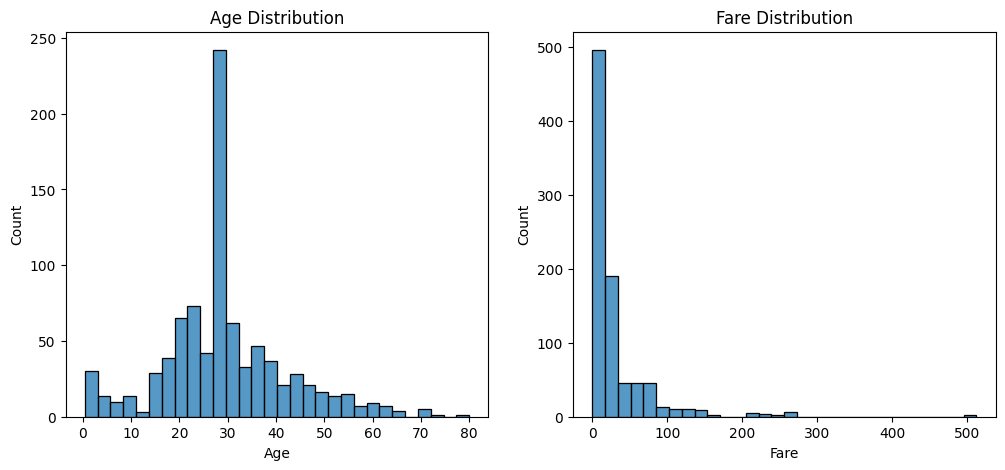

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(12,5))
sns.histplot(titanic_dataset["Age"].dropna(), bins=30, ax=axes[0])
axes[0].set_title("Age Distribution")

sns.histplot(titanic_dataset["Fare"].dropna(), bins=30, ax=axes[1])
axes[1].set_title("Fare Distribution")
plt.show()



In [ ]:
Q1 = titanic_dataset["Age"].quantile(0.25)
Q3 = titanic_dataset["Age"].quantile(0.75)
IQR = Q3 - Q1
lower_age = Q1 - 1.5*IQR
upper_age = Q3 + 1.5*IQR

Q1 = titanic_dataset["Fare"].quantile(0.25)
Q3 = titanic_dataset["Fare"].quantile(0.75)
IQR = Q3 - Q1
lower_fare = Q1 - 1.5*IQR
upper_fare = Q3 + 1.5*IQR


In [ ]:
from scipy.stats import zscore

titanic_dataset["Fare_z"] = zscore(titanic_dataset["Fare"].fillna(0))
titanic_dataset["Age_z"] = zscore(titanic_dataset["Age"].fillna(0))


outliers_fare = titanic_dataset[titanic_dataset["Fare_z"].abs() > 3]
outliers_age = titanic_dataset[titanic_dataset["Age_z"].abs() > 3]

In [ ]:
fare_cap = titanic_dataset["Fare"].quantile(0.98)
titanic_dataset["Fare_capped"] = titanic_dataset["Fare"].clip(upper=fare_cap)

age_cap = titanic_dataset["Age"].quantile(0.99)
titanic_dataset["Age_capped"] = titanic_dataset["Age"].clip(upper=age_cap)


In [ ]:
import numpy as np

titanic_dataset["Fare_log"] = np.log1p(titanic_dataset["Fare"])

In [ ]:
titanic_dataset_removed = titanic_dataset[(titanic_dataset["Fare"] <= upper_fare) & (titanic_dataset["Fare"] >= lower_fare)]


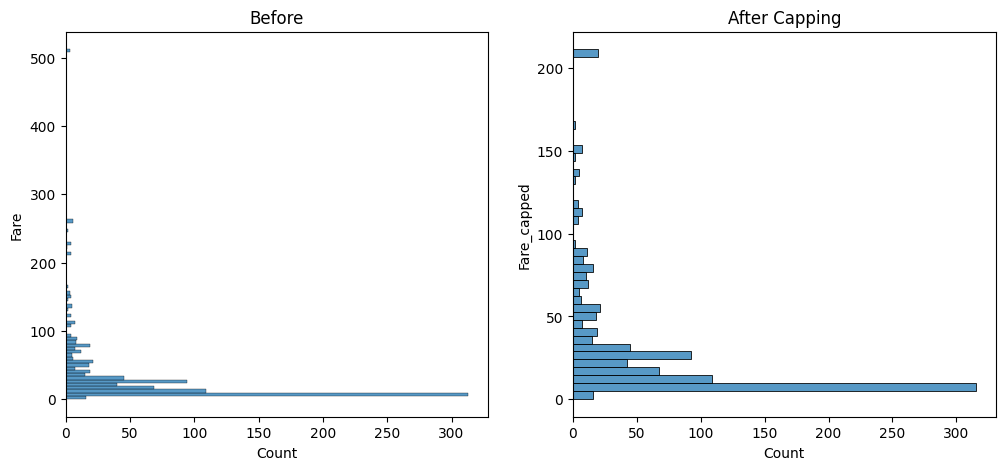

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12,5))

sns.histplot(y=titanic_dataset["Fare"], ax=axes[0])
axes[0].set_title("Before")

sns.histplot(y=titanic_dataset["Fare_capped"], ax=axes[1])
axes[1].set_title("After Capping")
plt.show()


In [20]:
from sklearn.preprocessing import StandardScaler, minmax_scale

num_cols = ["Age", "Fare"]

titanic_dataset["Age"] = titanic_dataset["Age"].fillna(titanic_dataset["Age"].median())
titanic_dataset["Fare"] = titanic_dataset["Fare"].fillna(titanic_dataset["Fare"].median())

scaler = StandardScaler()
titanic_dataset["Age_z"] = scaler.fit_transform(titanic_dataset[["Age"]])

scaler_standard = StandardScaler()
titanic_dataset["Fare_norm"] = scaler_standard.fit_transform(titanic_dataset[["Fare"]])

print(titanic_dataset[["Age", "Age_z", "Fare", "Fare_norm"]].head())

    Age     Age_z     Fare  Fare_norm
0  22.0 -0.563674   7.2500  -0.500240
1  38.0  0.669217  71.2833   0.788947
2  26.0 -0.255451   7.9250  -0.486650
3  35.0  0.438050  53.1000   0.422861
4  35.0  0.438050   8.0500  -0.484133


In [24]:
print(titanic_dataset.columns.tolist())

['PassengerId', 'Survived', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'FamilySize', 'Sex_male', 'Embarked_Q', 'Embarked_S', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Rare', 'Fare_z', 'Age_z', 'Fare_capped', 'Age_capped', 'Fare_log', 'Title', 'Fare_norm']


In [28]:
titanic_encoded = pd.get_dummies(titanic_dataset.drop(columns=["Title"]))
print("New dataset shape:", titanic_encoded.shape)
print("Encoded columns added:")
print([col for col in titanic_encoded.columns if col.startswith("sex_") or col.startswith("Embarked_") or col.startswith("Title_")])

print(titanic_encoded.head())

New dataset shape: (889, 1737)
Encoded columns added:
['Embarked_Q', 'Embarked_S', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Rare']
   PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare  FamilySize  \
0            1         0       3  22.0      1      0   7.2500           2   
1            2         1       1  38.0      1      0  71.2833           2   
2            3         1       3  26.0      0      0   7.9250           1   
3            4         1       1  35.0      1      0  53.1000           2   
4            5         0       3  35.0      0      0   8.0500           1   

   Sex_male  Embarked_Q  ...  Cabin_F E69  Cabin_F G63  Cabin_F G73  Cabin_F2  \
0      True       False  ...        False        False        False     False   
1     False       False  ...        False        False        False     False   
2     False       False  ...        False        False        False     False   
3     False       False  ...        False        False        False     False

In [32]:
bins = [0, 12, 18, 60, np.inf]
labels = ["Child", "Teen", "Adult", "Senior"]

titanic_dataset["AgeGroup"] = pd.cut(
    titanic_dataset["Age"],
    bins=bins,
    labels=labels,
    right=False,
    include_lowest=True
)

age_dummies = pd.get_dummies(titanic_dataset["AgeGroup"], prefix="Age_Group", drop_first=True)

titanic_dataset = pd.concat([titanic_dataset, age_dummies], axis=1)

print("Counts per AgeGroup")
print(titanic_dataset["AgeGroup"].value_counts(dropna=False))
print("\n Preview of encoded columns:")
print(titanic_dataset[["Age", "AgeGroup"] + age_dummies.columns.tolist()].head())




Counts per AgeGroup
AgeGroup
Adult     751
Child      68
Teen       45
Senior     25
Name: count, dtype: int64

 Preview of encoded columns:
    Age AgeGroup  Age_Group_Teen  Age_Group_Teen  Age_Group_Adult  \
0  22.0    Adult           False           False             True   
1  38.0    Adult           False           False             True   
2  26.0    Adult           False           False             True   
3  35.0    Adult           False           False             True   
4  35.0    Adult           False           False             True   

   Age_Group_Adult  Age_Group_Senior  Age_Group_Senior  
0             True             False             False  
1             True             False             False  
2             True             False             False  
3             True             False             False  
4             True             False             False  
